Группа 2373, Нупрейчик Маргарита

## О выбранном [датасете](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors).  
Область: образование.  
Источник данных: синтетический датасет, созданный для образовательных и аналитических целей.  


20 признаков (13 категориальные, 7 числовые).  
|Признак|Описание признака|
|-------|-----------------|
|Hours_Studied|Число часов, уделяемых учебе в неделю|
|Attendance|Процент посещенных занятий|
|Parental_Involvement|Показатель вовлеченности родителей (Low, Medium, High)|
|Access_to_Resources|Показатель доступности образовательных ресурсов (Low, Medium, High)|
|Extracurricular_Activities|Участие во внеучебных активностях (Yes, No)|
|Sleep_Hours|Среднее значение часов сна ночью|
|Previous_Scores|Предыдущие результаты экзаменов|
|Motivation_Level|Уровень мотивации к учебе (Low, Medium, High)|
|Internet_Access|Наличие доступа к интернету (Yes, No)|
|Tutoring_Sessions|Количество часов с репетитором в месяц|
|Family_Income|Уровень дохода семьи (Low, Medium, High)|
|Teacher_Quality|Уровень квалификации учителя (Low, Medium, High)|
|School_Type|Тип посещаемой школы (Public, Private)|
|Peer_Influence|Влияние сверстников на успеваемость (Positive, Neutral, Negative)|
|Physical_Activity|Среднее число часов в неделю, уделяемых физ. активности|
|Learning_Disabilities|Наличие болезней, влияющих на обучаемость (Yes, No)|
|Parental_Education_Level|Самый высокий уровень образования родителей (High School, College, Postgraduate)|
|Distance_from_Home|Удаленность школы от дома (Near, Moderate, Far)|
|Gender|Пол (Male, Female)|
|Exam_Score|Результат экзамена|

 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head(n=10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


 Проверим наличие пустых значений:

In [3]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Пропущенно порядочное количество значений в столбцах Teacher_Quality, Parental_Education_Level, Distance_from_Home. Строк, содержащих пропущенные значение мало - целесообразно просто удалить их.

In [4]:
df = df.dropna()
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Построим гистограммы для числовых и категориальных признаков.

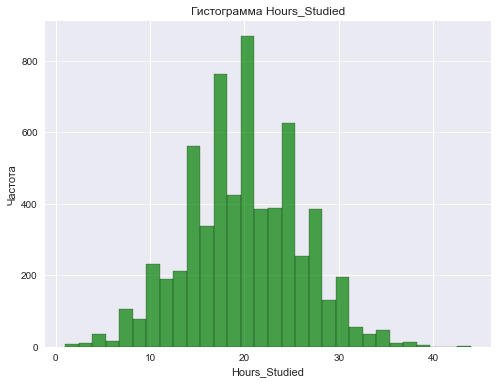

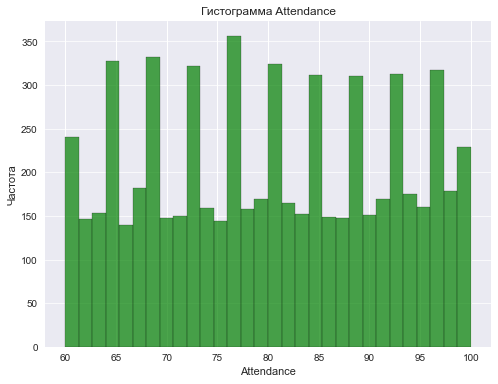

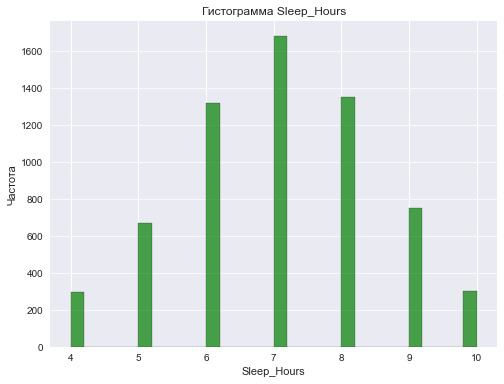

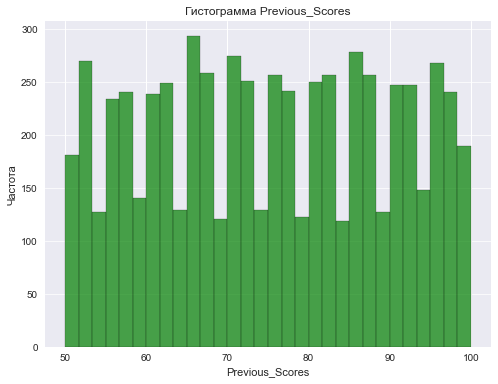

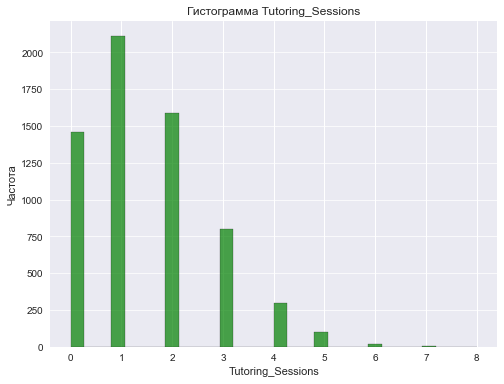

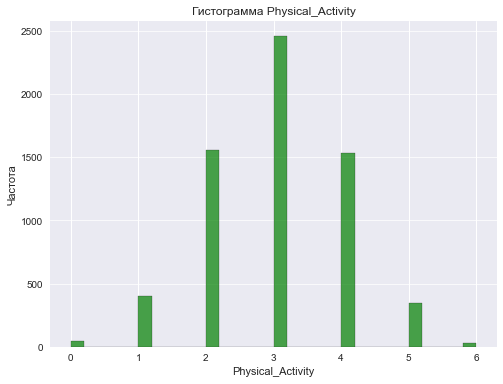

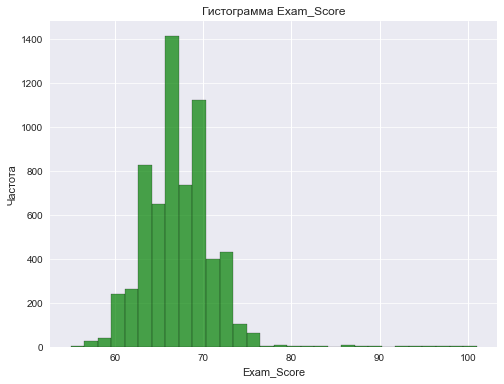

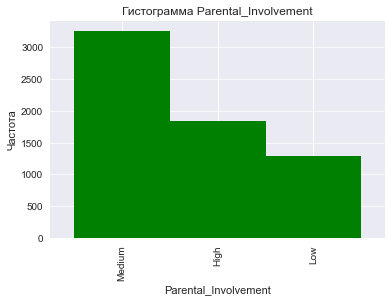

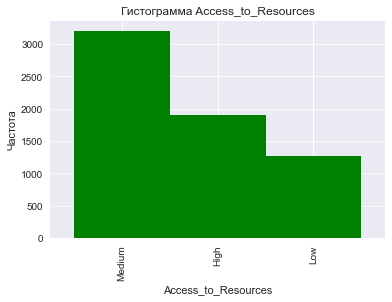

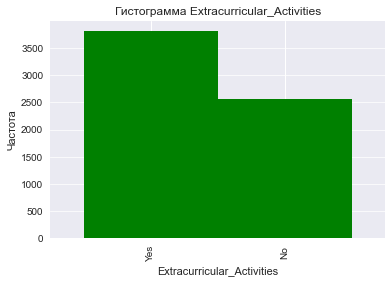

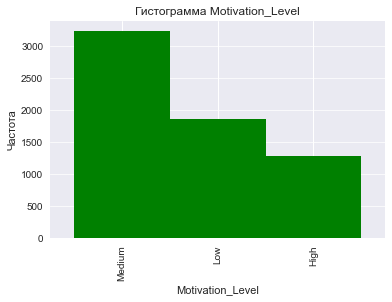

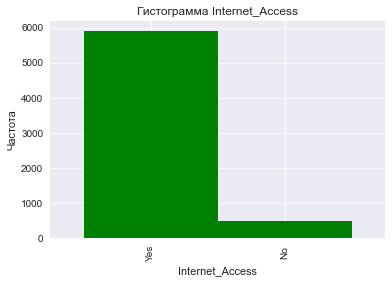

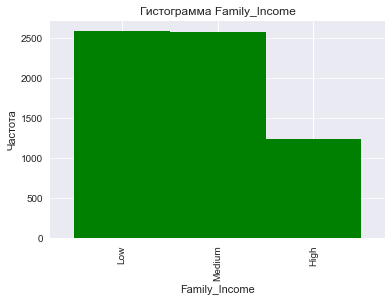

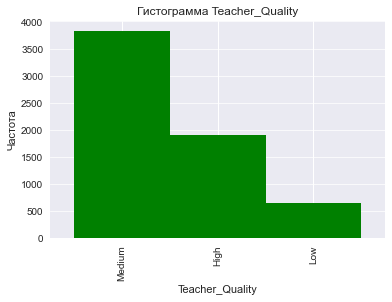

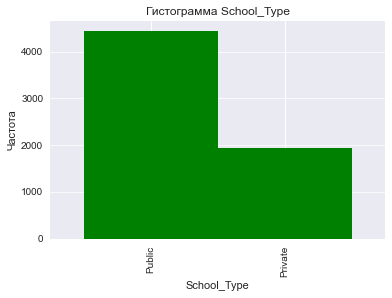

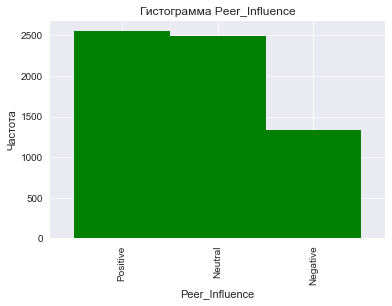

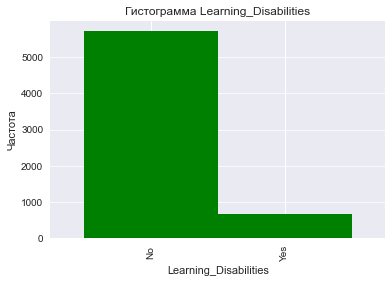

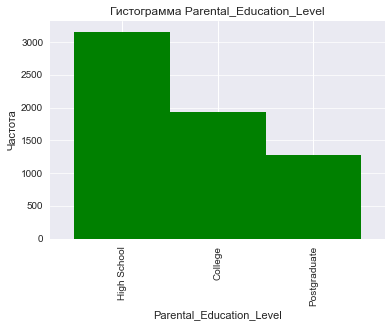

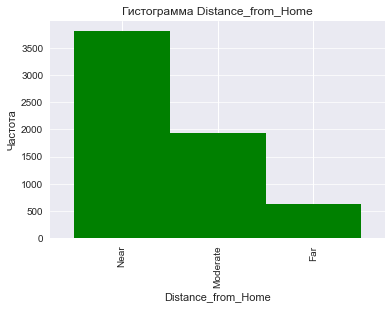

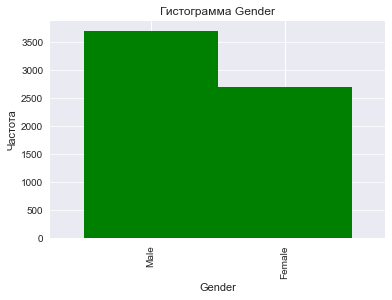

In [8]:
categorical_features = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income',
                        'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

numerical_features = [x for x in df.columns if x not in categorical_features]

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.title(f'Гистограмма {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
for feature in categorical_features:
    df[feature].value_counts().plot(kind='bar', width=1, color='green')
    plt.title(f'Гистограмма {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Для дальнейшей работы нужно закодировать категориальные числовые признаки числами.  
Описание работы функции:
1) Из категориального столбца выбираем уникальные значения.
2) Чтобы в дальнейшем иметь возможность однозначно определить, какая категория каким числом была закодирована, сортируем список уникальных значений.
3) Кодируем значение его индексом в списке.

In [12]:
def categorical_to_numerical_process(dataframe, column):
    
    def convert_to_index(value, uniq_values):
        return uniq_values.index(value)
        
    lists_uniq_values = sorted(list(set(df[column])))
    df[column] = df[column].apply(lambda x: convert_to_index(x, lists_uniq_values))
    

for feature in categorical_features:
    categorical_to_numerical_process(df, feature)
    
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


Для нахожденис среднего и СКО используется функция describe()

In [15]:
df.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,1.221856,1.204453,0.596896,7.034964,75.066165,1.307306,0.923957,1.495296,1.209470,1.301192,0.695202,1.191753,2.972719,0.104735,0.896676,1.496237,0.578238,67.252117
std,5.985460,11.550723,0.865149,0.870959,0.490560,1.468033,14.400389,0.783201,0.265087,1.233984,0.742549,0.898870,0.460358,0.756394,1.028926,0.306236,0.702926,0.670442,0.493880,3.914217
min,1.000000,60.000000,0.000000,0.000000,0.000000,4.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,0.000000,0.000000,0.000000,6.000000,63.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.000000,75.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,2.000000,1.000000,67.000000
75%,24.000000,90.000000,2.000000,2.000000,1.000000,8.000000,88.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,4.000000,0.000000,1.000000,2.000000,1.000000,69.000000
max,44.000000,100.000000,2.000000,2.000000,1.000000,10.000000,100.000000,2.000000,1.000000,8.000000,2.000000,2.000000,1.000000,2.000000,6.000000,1.000000,2.000000,2.000000,1.000000,101.000000


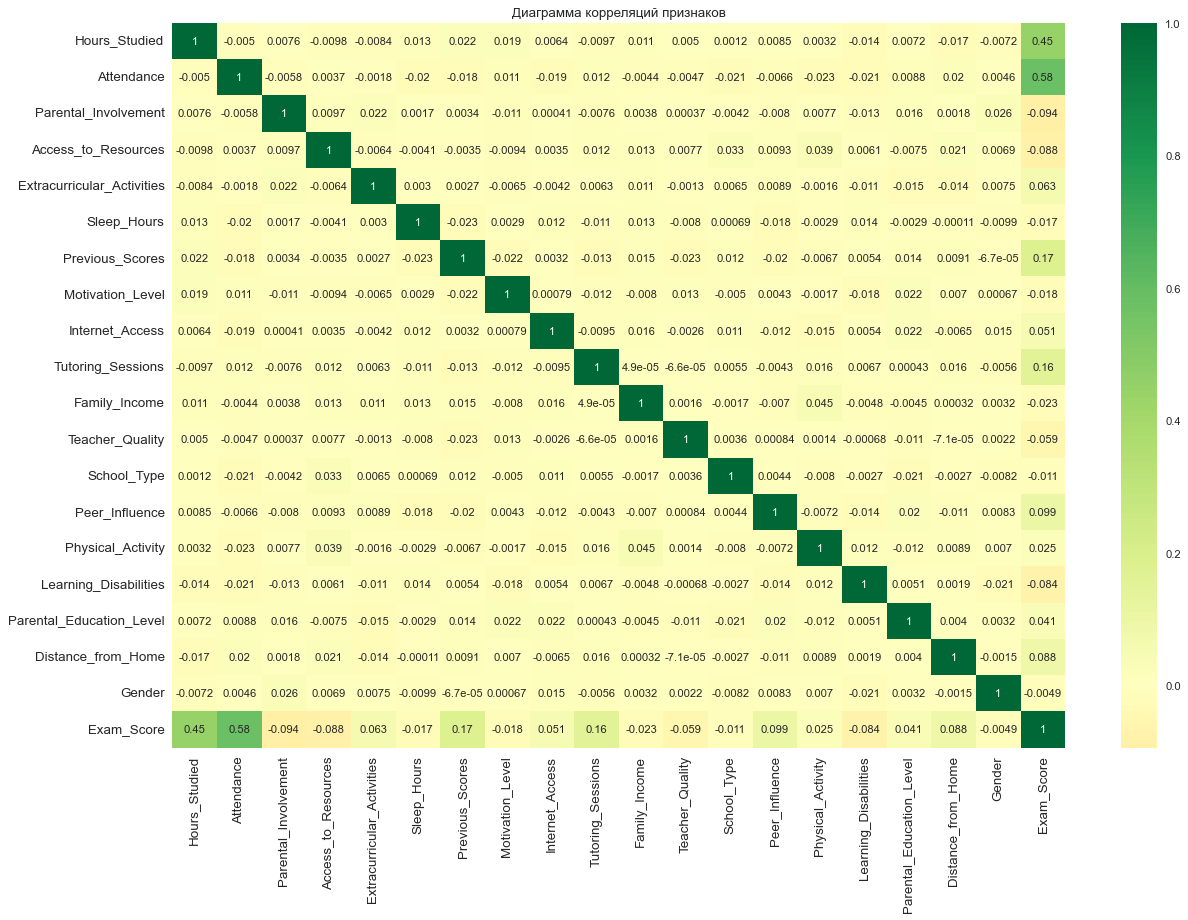

In [16]:
plt.figure(figsize=(18,12), dpi=80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, center=0, annot=True, cmap='RdYlGn',)

plt.title('Диаграмма корреляций признаков', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Из матрицы корреляций видно, что наибольшая корреляция между парами признаков Attendance/Exam_Score и Hours_Studied/Exam_score. Более слабая корреляция наблюдается между Previous_Scores/Exam_Score, Tutoring_Sessions/Exam_Score. 

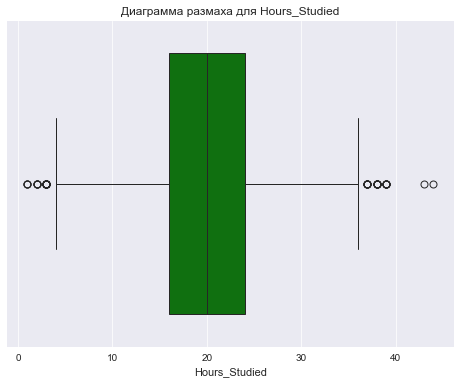

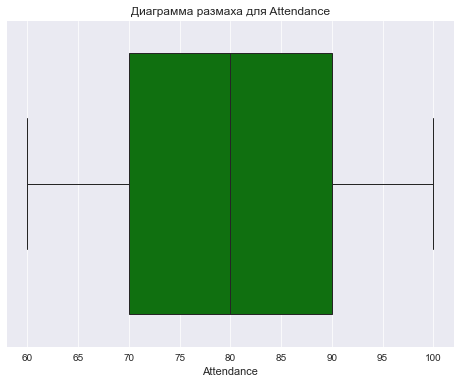

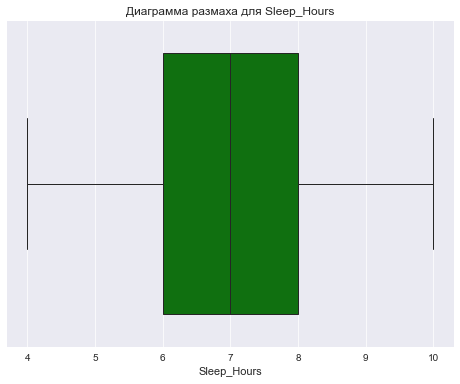

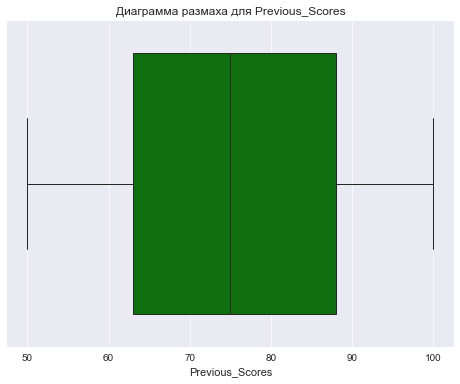

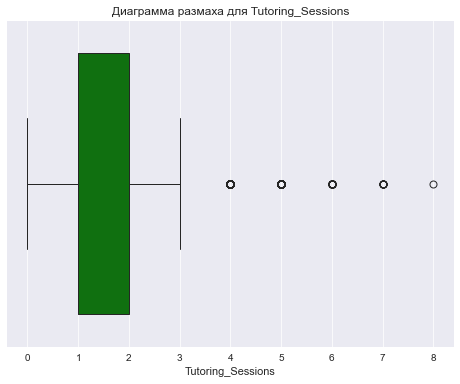

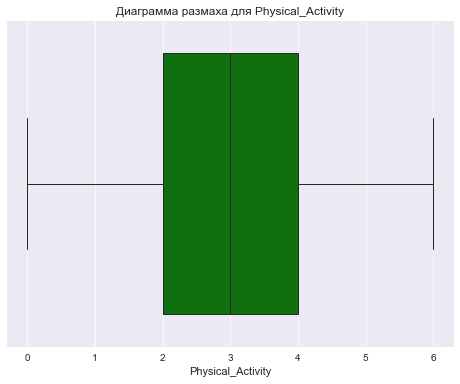

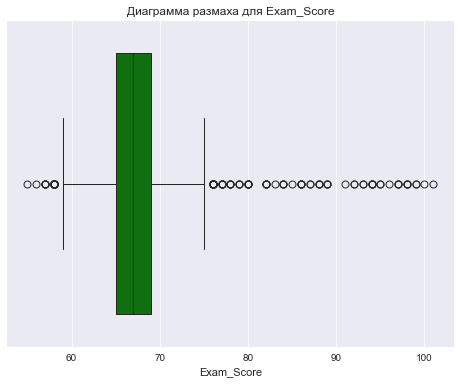

In [17]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], color='green')
    plt.title(f'Диаграмма размаха для {feature}')
    plt.xlabel(feature)
    plt.grid(axis='x', alpha=0.75)
    plt.show()